In [3]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'text.usetex': True,
    'font.family': 'serif',
    'pgf.rcfonts': False,
})

def read_files(files):
    data = []
    for f in files:
        data += [pd.read_csv(f, sep=',', skipinitialspace=True)]
    return data

[balls, full] = read_files(['data/balls.csv', 'data/full.csv'])
balls['d'] = (balls['d1'] + balls['d2'] + balls['d3']) / 3
balls.to_csv('data/balls.csv', float_format='%.2f', index=False)


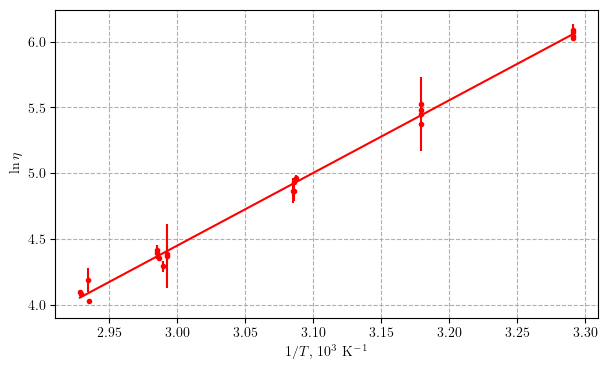

In [4]:
inv_T = 1000 / (full['T'] + 273)
ln_eta = np.log(full['eta'])

plt.figure(figsize=(7, 4))
plt.errorbar(inv_T, ln_eta, fmt='r.', yerr=full['deta'] / full['eta'])
z = np.linspace(min(inv_T), max(inv_T), 1000)
[a, b], cov = np.polyfit(inv_T, ln_eta, deg=1, cov=True)
plt.plot(z, a * z + b, color='red')

plt.xlabel('$1/T$, $10^3$ K$^{-1}$')
plt.ylabel('$\ln \eta$')
plt.grid(linestyle='--')
plt.savefig('data/graph.pdf')

In [10]:
K_BOLTZ = 1.38e-23

a_err = np.sqrt(np.diag(cov))[0]
sys_err = np.mean(full['deta'] / (full['eta'] * (max(ln_eta) - min(ln_eta))))
full_err = np.sqrt(a_err**2 + (a * sys_err)**2)
eps = full_err / a
print(f'a = {a:.2f}, aerr = {a_err:.2f}, sys_err = {a * sys_err:.2f},\
      full_err = {full_err:.2f}, eps = {eps}')
W = a * K_BOLTZ * 10**3
print(f'W = {W} pm {W * eps}')

a = 5.53, aerr = 0.09, sys_err = 0.15,      full_err = 0.17, eps = 0.03145145675233652
W = 7.625449798978944e-20 pm 2.398315045696995e-21
